In [1]:
import pandas as pd 

In [2]:
#loading the training dataset :
train=pd.read_csv("twitter_training.csv")
test=pd.read_csv('twitter_validation.csv')

In [3]:
train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
test.columns = ['Header1', 'company','labels','text']
train.columns = ['Header1', 'company','labels','text']

In [6]:
print(train)

       Header1      company    labels  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74676     9200       Nvidia  Positive   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   

                                                    text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac wi

In [7]:
print(test)

     Header1              company      labels  \
0        352               Amazon     Neutral   
1       8312            Microsoft    Negative   
2       4371                CS-GO    Negative   
3       4433               Google     Neutral   
4       6273                 FIFA    Negative   
..       ...                  ...         ...   
994     4891  GrandTheftAuto(GTA)  Irrelevant   
995     4359                CS-GO  Irrelevant   
996     2652          Borderlands    Positive   
997     8069            Microsoft    Positive   
998     6960      johnson&johnson     Neutral   

                                                  text  
0    BBC News - Amazon boss Jeff Bezos rejects clai...  
1    @Microsoft Why do I pay for WORD when it funct...  
2    CSGO matchmaking is so full of closet hacking,...  
3    Now the President is slapping Americans in the...  
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...  
..                                                 ...  
994  ⭐️ Toro

In [8]:
#let's drop unneeded columns:
train.drop(columns=["Header1","company"],inplace=True)
test.drop(columns=["Header1","company"],inplace=True)

In [9]:
train.head()

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [10]:
test.head()

,labels,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
#let's create one data frame:
sentiment=pd.concat([train,test],ignore_index=True)
sentiment

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
75675,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,Positive,Today sucked so it’s time to drink wine n play...
75678,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  75680 non-null  object
 1   text    74994 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [13]:
sentiment.isnull().sum()

labels      0
text      686
dtype: int64

In [14]:
#let's drop the null values:
sentiment.dropna(inplace=True)
sentiment.isnull().sum()

labels    0
text      0
dtype: int64

In [15]:
sentiment.duplicated().sum()

4743

In [16]:
#let's drop duplicated values also:
sentiment.drop_duplicates(inplace=True)
sentiment.duplicated().sum()

0

***Let's preprocess the texts now:***

In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

# Télécharger les ressources nécessaires
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data/')
nltk.download('omw-1.4', download_dir='/kaggle/working/nltk_data/')
nltk.download('stopwords', download_dir='/kaggle/working/nltk_data/')
nltk.download('punkt', download_dir='/kaggle/working/nltk_data/')

# Ajouter le chemin pour nltk_data
nltk.data.path.append('/kaggle/working/nltk_data/')


[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data/...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [26]:
# Fonction pour nettoyer le texte
def process_text(text):
    # Remove extra white space from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # Remove all the special characters from text
    text = re.sub(r'\W', ' ', str(text))
    
    # Remove all single characters from text
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove any character that isn't alphabetical
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert text to lower case
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Remove words with length <= 3
    words = [word for word in words if len(word) > 3]
    
    # Remove duplicate words while preserving order
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    
    return cleaned_text

In [27]:
x=sentiment.drop('labels',axis=1)
y=sentiment.labels

In [28]:
texts=list(x['text'])

In [29]:
cleaned_text = [process_text(text) for text in texts]

In [31]:
print(cleaned_text[:10])

[['coming', 'border', 'kill'], ['getting', 'borderland', 'kill'], ['coming', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'couple', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'picture', 'compared', 'creation', 'made', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya

In [32]:
#let's split the data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 40000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

the size of vocab = 24048


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [35]:
y.value_counts()

labels
Negative      21329
Positive      19270
Neutral       17281
Irrelevant    12371
Name: count, dtype: int64

***The Model***

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense,Input,GlobalMaxPooling1D,Dropout,Bidirectional
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=100
inputt=Input(shape=(maxlen,))

In [37]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt)
x = Dropout(0.5)(x)
x = Bidirectional(GRU(200))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [39]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
history = model.fit(X_train, y_train_one_hot, epochs=40, validation_data=(X_test, y_test_one_hot))

Epoch 1/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 359s 197ms/step - accuracy: 0.3789 - loss: 1.3083 - val_accuracy: 0.5997 - val_loss: 1.0058
Epoch 2/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 317s 180ms/step - accuracy: 0.6171 - loss: 0.9372 - val_accuracy: 0.6943 - val_loss: 0.7922
Epoch 3/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 329s 187ms/step - accuracy: 0.7246 - loss: 0.7154 - val_accuracy: 0.7652 - val_loss: 0.6283
Epoch 4/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 298s 170ms/step - accuracy: 0.7885 - loss: 0.5573 - val_accuracy: 0.7994 - val_loss: 0.5390
Epoch 5/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 299s 170ms/step - accuracy: 0.8268 - loss: 0.4650 - val_accuracy: 0.8192 - val_loss: 0.4864
Epoch 6/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 303s 172ms/step - accuracy: 0.8472 - loss: 0.4093 - val_accuracy: 0.8291 - val_loss: 0.4543
Epoch 7/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 306s 174ms/step - accuracy: 0.8644 - loss: 0.3668 - val_accuracy: 0.8361 - val_loss: 0.4337
Epoch 8/40
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 278s 158ms/step - ac

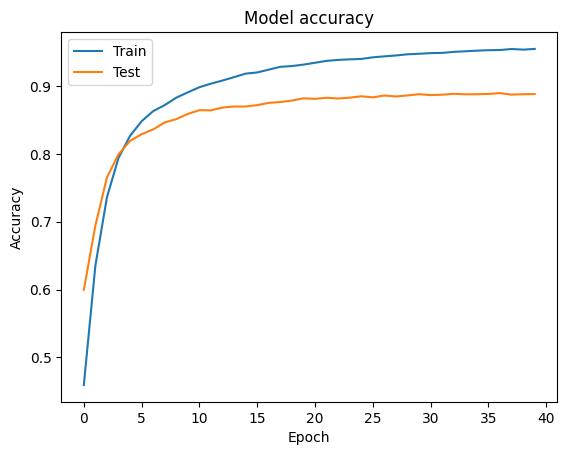

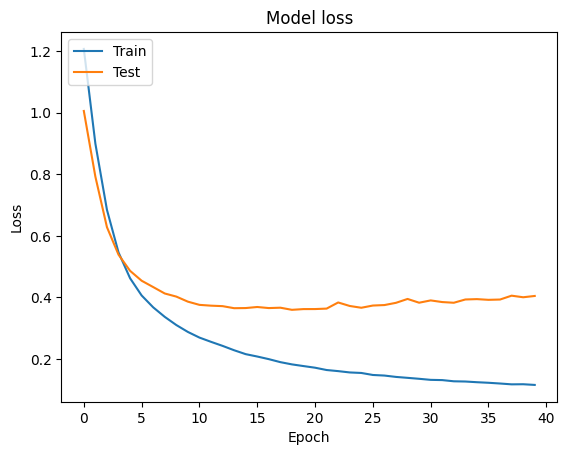

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

440/440 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8913 - loss: 0.3970
Test Loss: 0.4047599136829376
Test Accuracy: 0.8881930112838745


440/440 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step


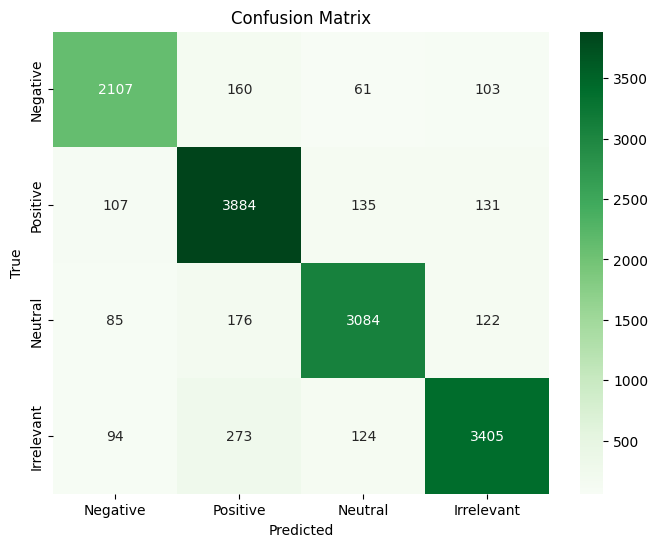

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'], 
            yticklabels=['Negative', 'Positive', 'Neutral', 'Irrelevant'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()